In [1]:
from pandas import Series, DataFrame
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
df = pd.read_csv('jobs.csv')
df[:5]

,Year,Month,jobs
0,1939,Jan,912.0
1,1940,Jan,980.0
2,1941,Jan,1201.0
3,1942,Jan,1756.0
4,1943,Jan,2956.0


### Convert this data into a time series

* First, convert the Year to a string
    * df['Year'] = df['Year'].astype(str)
* Then, create a column called "DateString" of the form "Jan 2011" (i.e., Month followed by Year, with a space in between)
* Convert this to the Pandas datetime format and save it in a column called "Date"
    * See pd.to_datetime(df['DateString'])
* Sort the DataFrame so that the dates are in increasing order, and then set Date as the index.

In [6]:
df["DateString"] = df["Month"] + " "+df["Year"].astype(str)
df["DateString"] = pd.to_datetime(df["DateString"])
df.set_index("DateString", inplace = True)
df.sort_index(inplace = True)
df.head()

,Year,Month,jobs
DateString,,,
1939-01-01,1939,Jan,912.0
1939-02-01,1939,Feb,925.0
1939-03-01,1939,Mar,929.0
1939-04-01,1939,Apr,933.0
1939-05-01,1939,May,941.0


### Plot the jobs numbers as a time series

Also plot the 1-year and 5-year moving averages.
Label these appropriately in a legend.

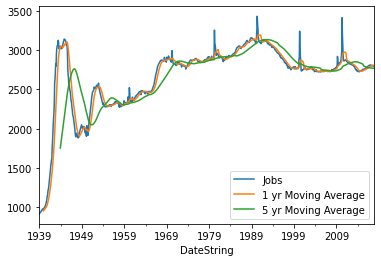

In [9]:
df["jobs"].plot(label = "Jobs")

# 1 year moving Average
df["jobs"].rolling(window=12).mean().plot(label = "1 yr Moving Average")


# 5 year moving Average
df["jobs"].rolling(window=60).mean().plot(label = "5 yr Moving Average")

legend(loc="best")

### Deviations from moving average

Find the dates where the jobs number was at least 500 more than the 1-year moving average

In [12]:
mask = (df["jobs"] - df["jobs"].rolling(12).mean()) >= 500
df[mask]

,Year,Month,jobs
DateString,,,
1942-08-01,1942,Aug,2583.0
1942-09-01,1942,Sep,2630.0
1942-10-01,1942,Oct,2734.0
1942-11-01,1942,Nov,2825.0
1943-01-01,1943,Jan,2956.0
1943-02-01,1943,Feb,3027.0
2010-05-01,2010,May,3416.0


### Another kind of deviation

Find the dates where the jobs number was at least 500 more than the jobs number 1 year earlier **and** at least 500 more than the number 1 year later.

In [18]:
mask1 = (df["jobs"] - df["jobs"].rolling(12).mean()) >= 500
mask2 = (df["jobs"] - df["jobs"].shift(12).rolling(12).mean()) >= 500
mask2
df[mask1 & mask2]

,Year,Month,jobs
DateString,,,
1942-08-01,1942,Aug,2583.0
1942-09-01,1942,Sep,2630.0
1942-10-01,1942,Oct,2734.0
1942-11-01,1942,Nov,2825.0
1943-01-01,1943,Jan,2956.0
1943-02-01,1943,Feb,3027.0
2010-05-01,2010,May,3416.0
